<a href="https://colab.research.google.com/github/Abigail1014/Aboutme/blob/aboutmemain/%C3%81rboles_de_decisi%C3%B3n.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
#Clasificador del modelo de árbol de decisión
from sklearn.tree import DecisionTreeClassifier, export_text, plot_tree
#Métricas para evaluar la clasificación
from sklearn.metrics import accuracy_score, roc_auc_score, cohen_kappa_score, f1_score
from sklearn.metrics import roc_curve #para obtener datos de una curva ROC
from sklearn.metrics import auc #para calcular el área AUC
#Herramienta para seleccionar modelos
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV #Validación cruzada
#Gráficos
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import seaborn as sns
from sklearn.decomposition import PCA
import warnings
warnings.filterwarnings('ignore') #para ignorar las advertencias

In [ ]:
Datos = pd.read_csv('credito.csv')
Datos.head()

,monto,plazo,edad,sexo,sector,mora
0,60000,20,40,hombre,construcción,0
1,60000,20,59,hombre,comercio,0
2,50000,25,43,hombre,construcción,0
3,50000,17,28,hombre,construcción,0
4,20000,7,56,hombre,comercio,0


In [ ]:
X = Datos[['plazo','edad']]
Y = Datos.mora

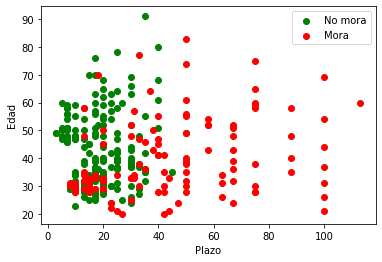

In [ ]:
plt.scatter(X.loc[Y == 0, 'plazo'], X.loc[Y == 0, 'edad'], c = 'green', label = 'No mora')
plt.scatter(X.loc[Y == 1, 'plazo'], X.loc[Y == 1, 'edad'], c = 'red', label = 'Mora')
plt.xlabel('Plazo')
plt.ylabel('Edad')
plt.legend()
plt.show()

# Árboles de decisión

Un árbol de decisión es un método de aprendizaje automático, que realiza predicciones para una variable de respuesta sobre la base de los valores de un conjunto de características o atributos. Un árbol de decisión es de clasificación si la variable de respuesta es discreta, y es un árbol de regresión si la variable dependiente es continua.

En el caso de la clasificación, se construye el modelo para predecir la categoría a la que podría pertenecer una observación, y en el caso de la regresión se predice el valor de la variable de respuesta dadas las características de la observación. El algoritmo denominado CART es el que se utiliza tanto para el modelo de clasificación como para el de regresión.

El algoritmo consiste en realizar secuencialmente particiones binarias del conjunto de datos, de tal forma que los grupos obtenidos a partir de la separaciones sean lo más homogéneos posibles internamente. Las particiones se realizan sobre la base de los valores de los atributos de las observaciones, estableciendo una condición que separa al conjunto de datos en dos grupos, donde los elementos de un grupo cumplen con la condición y los del otro grupo no la cumplen. La primera separación se lleva adelante en el denominado nodo raíz, donde se establece la primera condición. Las subsecuentes condiciones se aplican en los nodos internos. En los últimos nodos denominados hojas, no se realizan más divisiones. La profundidad del árbol es la cantidad de nodos que hay en el camino desde la raíz hasta los nodos de decisión más alejados.

Para medir la homogeneidad dentro de los grupos se tiene el índice Gini, para problemas de clasificación, donde valores cercanos a 0 indican mayor pureza y valores que tienden a 1 expresan más impureza
\begin{eqnarray*}
G &=&1-\sum_{j=1}^{K}p_{j}^{2}
\end{eqnarray*}
donde $p_{j}$ son las proporciones de clase en un nodo particular. Otra medida usual es la métrica de entropía, donde 0 indica mayor homogeneidad y valore más altos señalan mayor heterogeneidad
\begin{eqnarray*}
H &=&-\sum_{j=1}^{K}p_{j}\log _{2}p_{j}
\end{eqnarray*}
En el caso de la regresión, la medida de impureza más utilizada es el error cuadrático medio, donde valores bajos indican más pureza y valores altos expresan más impureza.

Para encontrar la mejor partición, se utiliza una función de costo que es una media ponderada de las medidas de impureza de los grupos de una partición dada. La ponderación utilizada es la proporción de elementos de cada grupo. Se aplica ésta función de costo a todas las particiones posibles de todas las características del conjunto de datos, y se selecciona la partición que proporciona el menor costo.

Una vez construido el modelo, se procede a predecir el valor de la variable de respuesta para un conjunto de observaciones, que puede ser el mismo conjunto de entrenamiento u otro conjunto que no se utilizó en el entrenamiento y se conoce como conjunto de validación. La utilización de éste último es apropiado para evaluar la capacidad de predicción del modelo. En el caso de que la variable de respuesta sea categórica, la predicción de un ejemplo es la clase más frecuente en la hoja donde se agrupa el elemento, y la medida de evaluación de la clasificación el la precisión, que es la proporción de predicciones correctas. Si la respuesta es continua entonces el valor de predicción es la media de los valores de la variable respuesta en el grupo de la hoja correspondiente, y la métrica de evaluación es el error cuadrático medio para todas las predicciones.

Las particiones sucesivas se podrían realizar hasta que todos los subgrupos construidos mediante las reglas de las condiciones, sean totalmente puros, pero tal hecho no permite que el modelo clasifique adecuadamente observaciones que no han formado parte del entrenamiento del modelo. En tal caso, se dice que el modelo está sobreajustado, porque se ajusta demasiado bien a los datos de entrenamiento pero su rendimiento con datos externos va a ser en general pobre. Para evitar el sobreajuste, se procede a podar el árbol, lo que se puede hacer eliminando nodos hasta que las predicciones con el conjunto de entrenamiento sean lo más próximos posibles a las predicciones con el conjunto de validación.

Otra forma de evitar el sobreajuste es, especificando previamente la profundidad del árbol a un número fijo, o limitando el número mínimo de observaciones que debe tener un nodo para aplicar la partición, o el número mínimo de elementos que debe tener un nodo hoja. Una ventaja de los árboles de decisión es la interpretabilidad de las reglas de decisión generadas por el modelo. Otra caracterítica conveniente de los árboles es que pueden ordenarse los atributos por importancia para la clasificación o regresión.


#Ejemplo gráfico

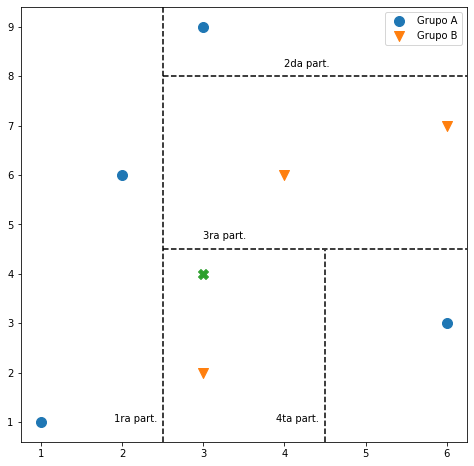

In [ ]:
from matplotlib import lines
Xa = np.array([[1,1],[2,6],[6,3],[3,9]])
Xb = np.array([[3,2],[6,7],[4,6]])
fig, ax = plt.subplots(figsize = (8, 8))
ax.scatter(Xa[:,0], Xa[:,1], marker='o', s=100, label='Grupo A')
ax.scatter(Xb[:,0], Xb[:,1], marker='v', s=100, label='Grupo B')
ax.axvline(2.5, color='black', linestyle='dashed')
ax.axhline(8, xmin=0.32, color='black', linestyle='dashed')
ax.axhline(4.5, xmin=0.32, color='black', linestyle='dashed')
ax.axvline(4.5, ymax=0.44, color='black', linestyle='dashed')
ax.scatter(3,4, marker='X', s=100)
ax.text(1.9,1,'1ra part.')
ax.text(4,8.2,'2da part.')
ax.text(3,4.7,'3ra part.')
ax.text(3.9,1,'4ta part.')
ax.legend();

#Aplicación

Árbol de decisión con profundidad 5

In [ ]:
arbol = DecisionTreeClassifier(max_depth=5)
modelo = arbol.fit(X,Y)

Reglas de decisión

In [ ]:
print(export_text(arbol, feature_names=list(X)))

|--- plazo <= 36.00
|   |--- edad <= 22.50
|   |   |--- class: 1
|   |--- edad >  22.50
|   |   |--- edad <= 36.50
|   |   |   |--- plazo <= 28.50
|   |   |   |   |--- edad <= 31.50
|   |   |   |   |   |--- class: 0
|   |   |   |   |--- edad >  31.50
|   |   |   |   |   |--- class: 0
|   |   |   |--- plazo >  28.50
|   |   |   |   |--- plazo <= 32.00
|   |   |   |   |   |--- class: 1
|   |   |   |   |--- plazo >  32.00
|   |   |   |   |   |--- class: 0
|   |   |--- edad >  36.50
|   |   |   |--- plazo <= 30.50
|   |   |   |   |--- edad <= 44.50
|   |   |   |   |   |--- class: 0
|   |   |   |   |--- edad >  44.50
|   |   |   |   |   |--- class: 0
|   |   |   |--- plazo >  30.50
|   |   |   |   |--- plazo <= 32.00
|   |   |   |   |   |--- class: 1
|   |   |   |   |--- plazo >  32.00
|   |   |   |   |   |--- class: 0
|--- plazo >  36.00
|   |--- plazo <= 41.00
|   |   |--- edad <= 66.00
|   |   |   |--- edad <= 50.50
|   |   |   |   |--- edad <= 42.00
|   |   |   |   |   |--- class: 1
|  

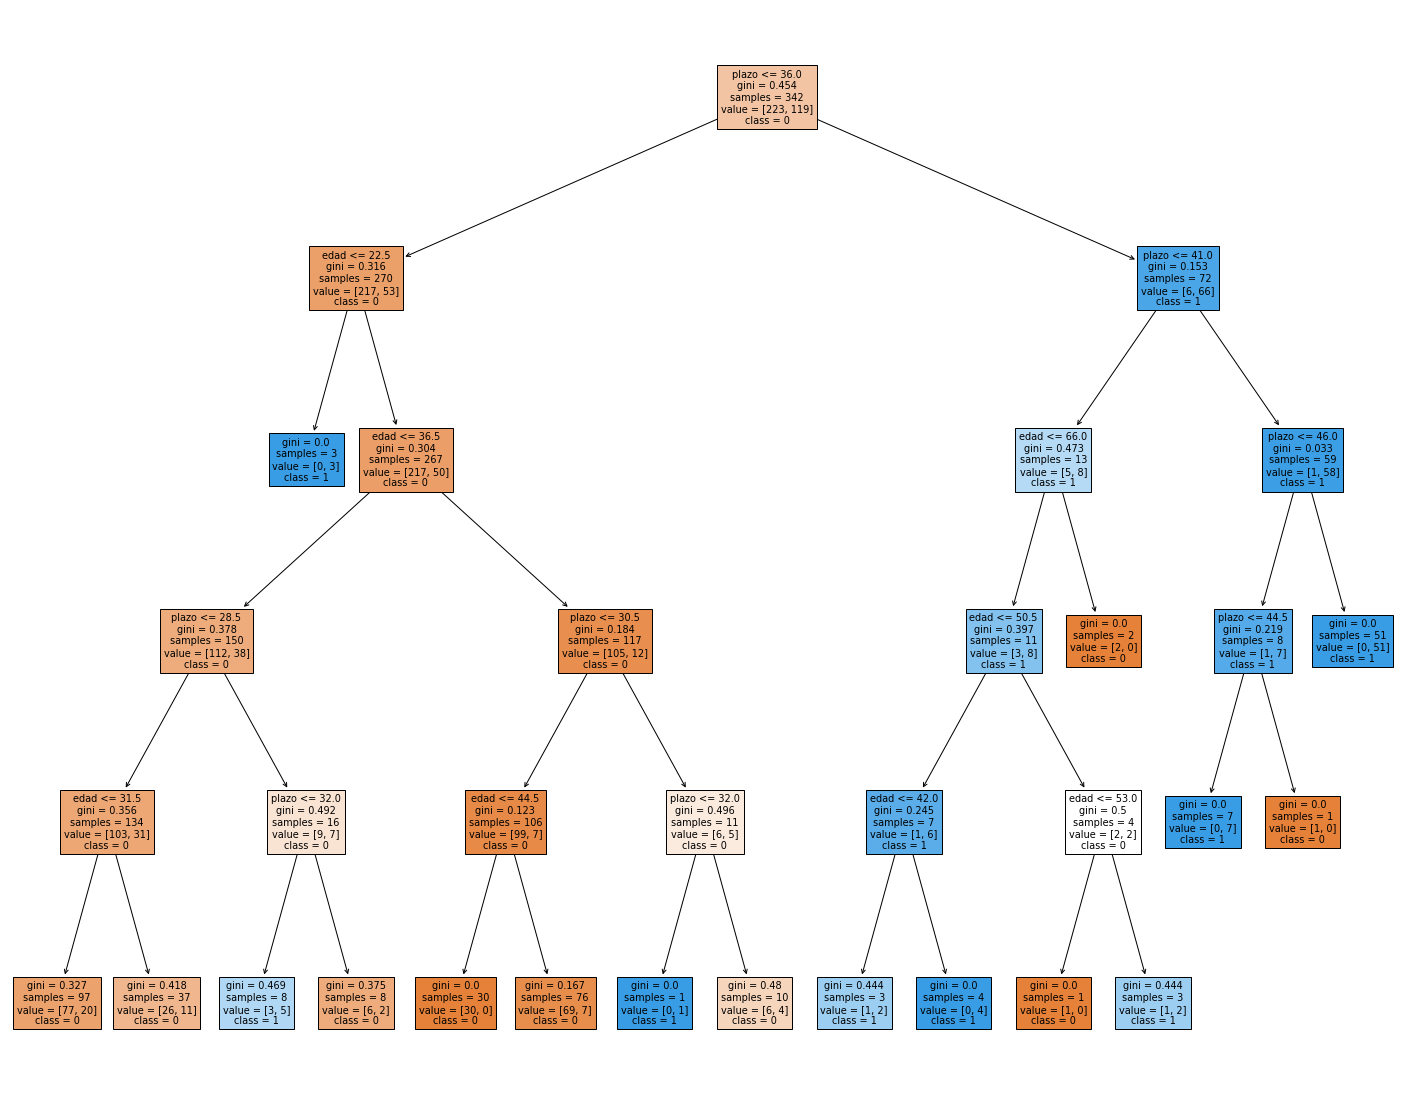

In [ ]:
fig = plt.figure(figsize=(25,20))
plot_tree(arbol, feature_names=list(X), class_names=Y.astype('str').unique(), filled=True);
fig.savefig("arbol.png")

In [ ]:
modelo.predict([[35,21]])

array([1])

In [ ]:
modelo.predict_proba([[15,42]])

array([[1., 0.]])

In [ ]:
modelo.predict(pd.DataFrame([{'plazo': 15, 'edad': 44}]))

array([0])

#Especificación de hiperparámetros

In [ ]:
arbol = DecisionTreeClassifier(min_samples_split=20)
modelo = arbol.fit(X,Y)

In [ ]:
print(export_text(arbol, feature_names=list(X)))

|--- plazo <= 36.00
|   |--- edad <= 22.50
|   |   |--- class: 1
|   |--- edad >  22.50
|   |   |--- edad <= 36.50
|   |   |   |--- plazo <= 28.50
|   |   |   |   |--- edad <= 31.50
|   |   |   |   |   |--- plazo <= 16.00
|   |   |   |   |   |   |--- edad <= 27.00
|   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |--- edad >  27.00
|   |   |   |   |   |   |   |--- edad <= 28.50
|   |   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |   |--- edad >  28.50
|   |   |   |   |   |   |   |   |--- plazo <= 9.00
|   |   |   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |   |   |--- plazo >  9.00
|   |   |   |   |   |   |   |   |   |--- edad <= 30.50
|   |   |   |   |   |   |   |   |   |   |--- plazo <= 14.00
|   |   |   |   |   |   |   |   |   |   |   |--- truncated branch of depth 3
|   |   |   |   |   |   |   |   |   |   |--- plazo >  14.00
|   |   |   |   |   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |   |   |   |--- edad > 

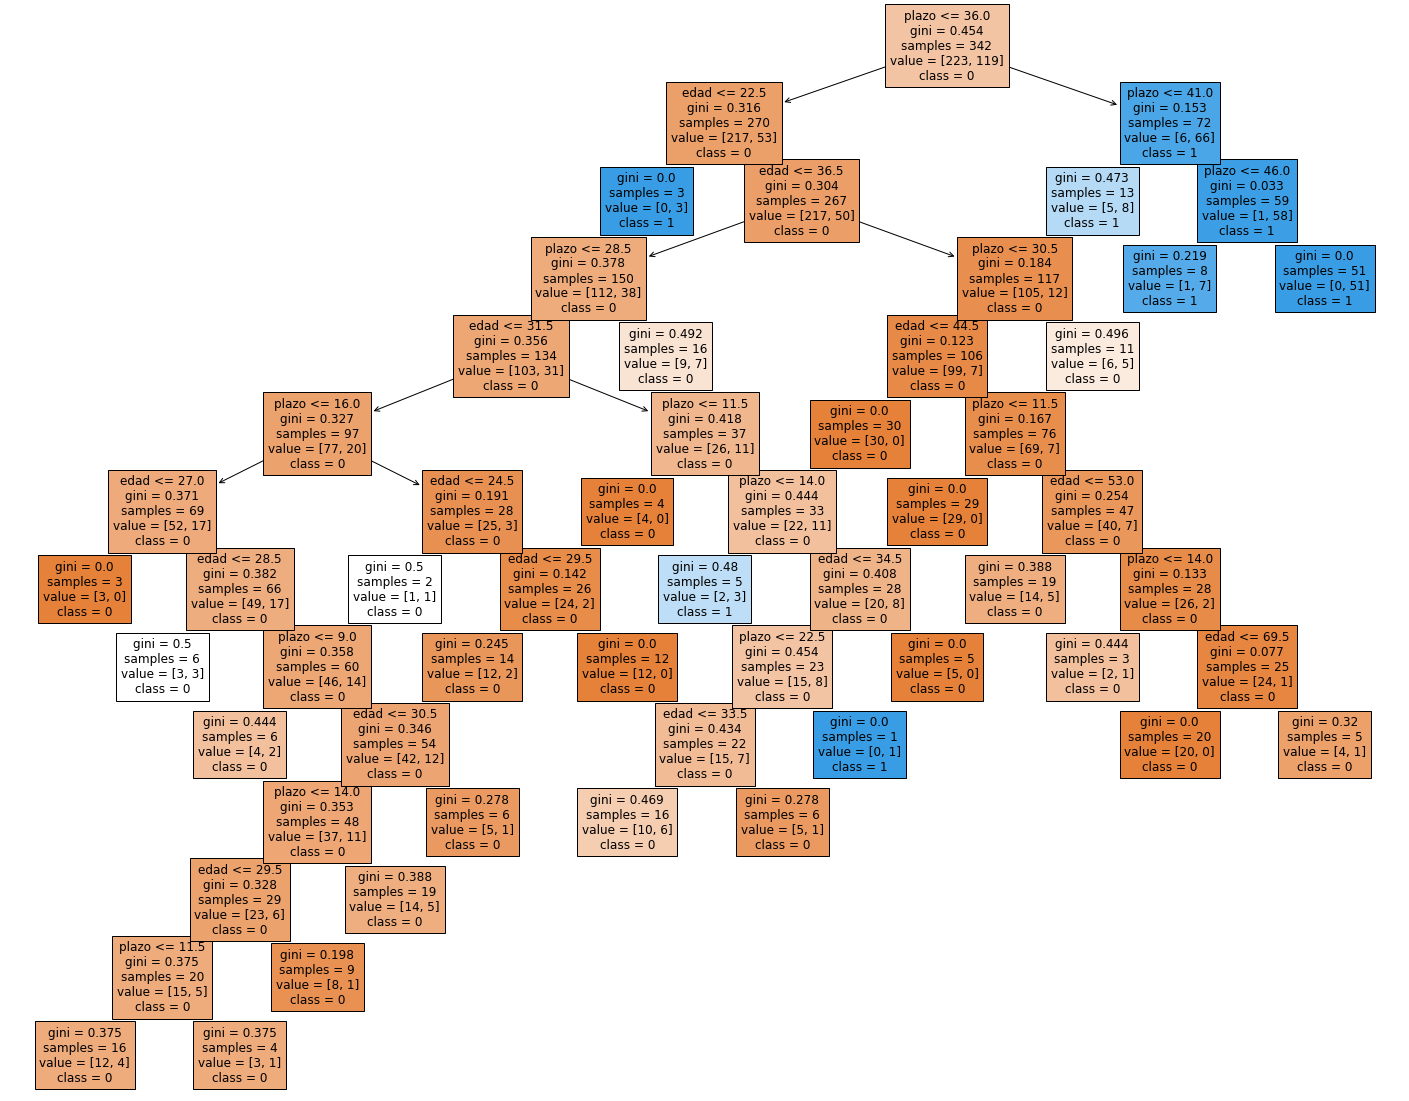

In [ ]:
fig = plt.figure(figsize=(25,20))
plot_tree(arbol, feature_names=list(X), class_names=Y.astype('str').unique(), filled=True);
fig.savefig("arbol.png")

In [ ]:
arbol = DecisionTreeClassifier(min_samples_leaf=15)
modelo = arbol.fit(X,Y)

In [ ]:
print(export_text(arbol, feature_names=list(X)))

|--- plazo <= 36.00
|   |--- edad <= 34.50
|   |   |--- plazo <= 21.50
|   |   |   |--- edad <= 31.50
|   |   |   |   |--- plazo <= 18.50
|   |   |   |   |   |--- plazo <= 11.50
|   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |--- plazo >  11.50
|   |   |   |   |   |   |--- class: 0
|   |   |   |   |--- plazo >  18.50
|   |   |   |   |   |--- class: 0
|   |   |   |--- edad >  31.50
|   |   |   |   |--- class: 0
|   |   |--- plazo >  21.50
|   |   |   |--- class: 0
|   |--- edad >  34.50
|   |   |--- plazo <= 30.50
|   |   |   |--- plazo <= 11.50
|   |   |   |   |--- class: 0
|   |   |   |--- plazo >  11.50
|   |   |   |   |--- edad <= 44.50
|   |   |   |   |   |--- plazo <= 21.50
|   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |--- plazo >  21.50
|   |   |   |   |   |   |--- class: 0
|   |   |   |   |--- edad >  44.50
|   |   |   |   |   |--- edad <= 53.00
|   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |--- edad >  53.00
|   |   |   |   |   |   |--- class

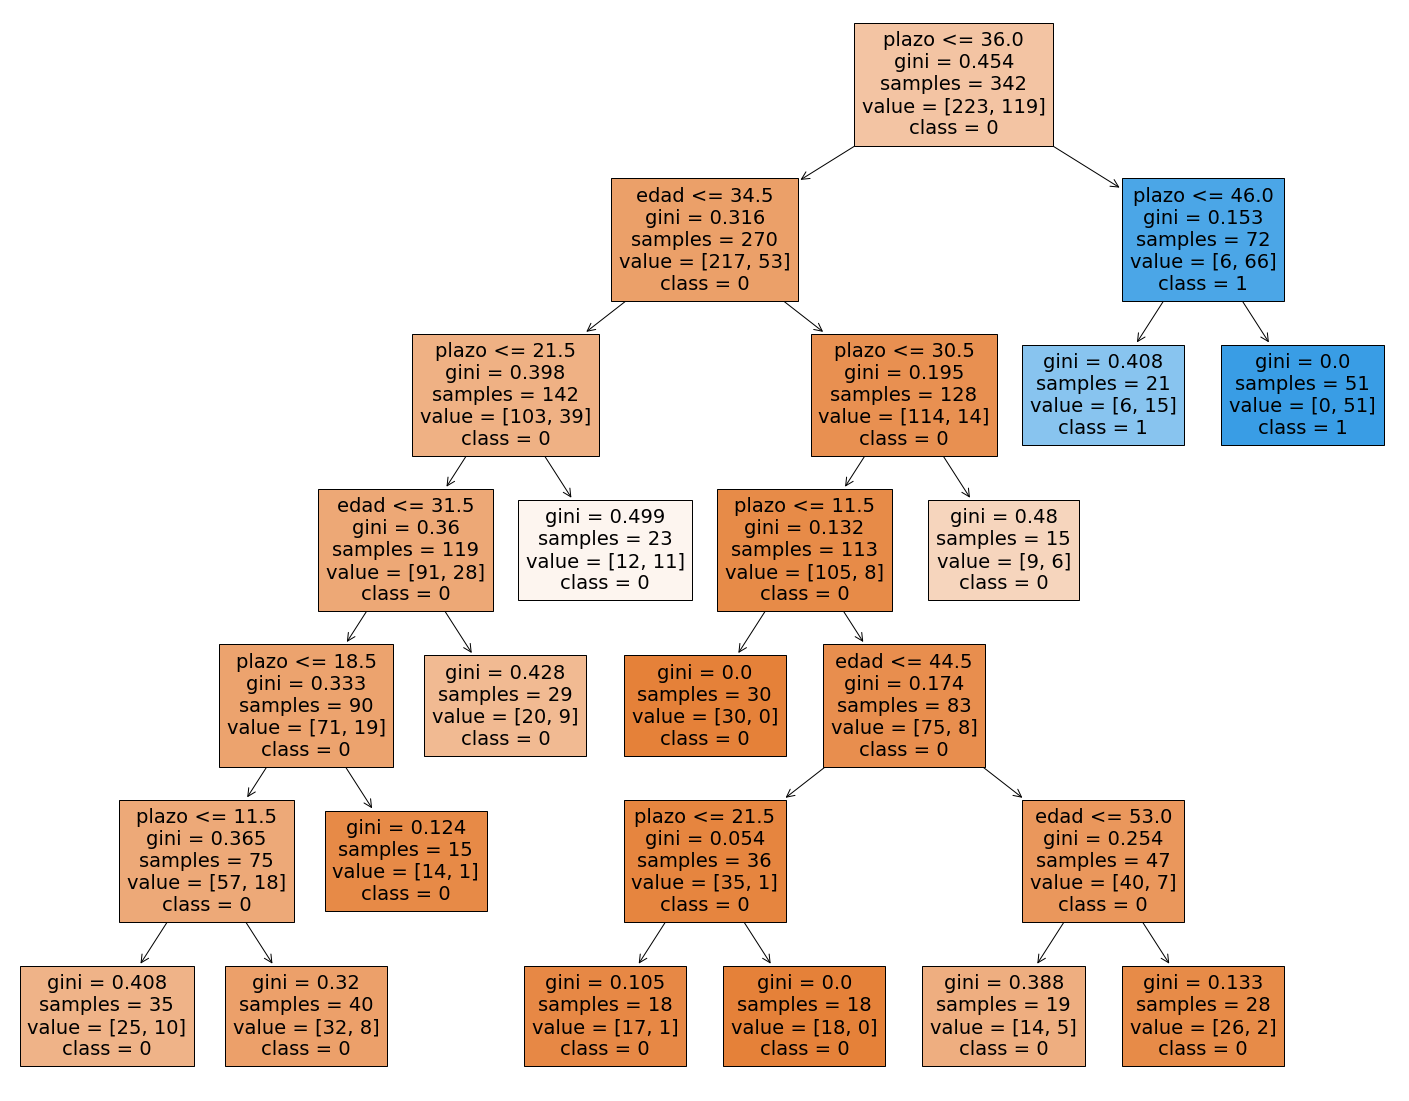

In [ ]:
fig = plt.figure(figsize=(25,20))
plot_tree(arbol, feature_names=list(X), class_names=Y.astype('str').unique(), filled=True);
fig.savefig("arbol.png")

#Gráfico de clasificación

In [ ]:
def graf(X1, X2, Y, modelo):
  rango1 = np.arange(X1.min()-1, X1.max()+2)
  rango2 = np.arange(X2.min()-1, X2.max()+2)
  Z1, Z2 = np.meshgrid(rango1, rango2)
  Z = np.array([Z1.ravel(), Z2.ravel()]).T
  Ypr = modelo.predict(Z).reshape(Z1.shape) #reshape redimensiona a la dimensión de Z1
  Ypr = Ypr==np.unique(Y)[0] #selecciona el valor en la posición 0 de los valores únicos de Y
  plt.contourf(Z1, Z2, Ypr, alpha = 0.75, cmap = ListedColormap(('red', 'green')))
  plt.scatter(X1[Y == np.unique(Y)[0]], X2[Y == np.unique(Y)[0]],
              c = 'green', label = np.unique(Y)[0])
  plt.scatter(X1[Y == np.unique(Y)[1]], X2[Y == np.unique(Y)[1]],
              c = 'red', label = np.unique(Y)[1])
  plt.title('Clasificación')
  plt.xlabel('X1')
  plt.ylabel('X2')
  plt.legend()
  plt.show()

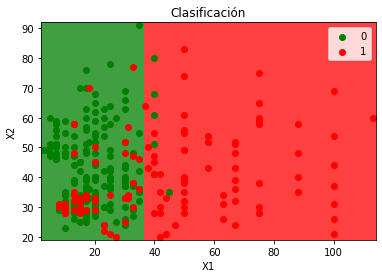

In [ ]:
graf(X.iloc[:,0], X.iloc[:,1], Y, modelo)

#Evaluación

In [ ]:
Xen, Xpr, Yen, Ypr = train_test_split(X,Y)

In [ ]:
modelo = DecisionTreeClassifier().fit(Xen,Yen)

In [ ]:
modelo.score(Xpr,Ypr)

0.7558139534883721

In [ ]:
Yprp = modelo.predict(Xpr)
pd.crosstab(Ypr,Yprp)

col_0,0,1
mora,,
0,41,7
1,14,24


In [ ]:
print('Precisión:', accuracy_score(Ypr,Yprp))
print('F1:', f1_score(Ypr,Yprp))
print('AUC:', roc_auc_score(Ypr,Yprp))
print('Kappa:', cohen_kappa_score(Ypr,Yprp))

Precisión: 0.7558139534883721
F1: 0.6956521739130435
AUC: 0.7428728070175438
Kappa: 0.49524874231414195


#Validación cruzada

In [ ]:
valcruz = cross_val_score(DecisionTreeClassifier(), X, Y)
np.mean(valcruz)

0.777621483375959

In [ ]:
valcruz = cross_val_score(DecisionTreeClassifier(), X, Y, scoring='roc_auc')
np.mean(valcruz)

0.7440494620114185

#Búsqueda de mejores hiperparámetros

In [ ]:
medida = 'roc_auc'
arbol = DecisionTreeClassifier()

Especificación de diferentes valores para los hiperparámetros del árbol de decisión

In [ ]:
hiperpar = {'max_depth': np.arange(3,8), #profundidad del árbol de 3 a 7
            'min_samples_leaf': np.arange(5,21), #mínimo de obs. por hoja de 5 a 20
            'min_samples_split': np.arange(8,26)} #mínimo de obs. para la partición de 8 a 25

In [ ]:
gscv = GridSearchCV(arbol, hiperpar, scoring=medida)
mod = gscv.fit(X,Y)
print(mod.best_score_)
print(mod.best_estimator_)

0.8049451947006295
DecisionTreeClassifier(ccp_alpha=0.01, max_depth=3, min_samples_leaf=15,
                       min_samples_split=8)


In [ ]:
Yp = mod.best_estimator_.predict(X)
pd.crosstab(Y,Yp)

col_0,0,1
mora,,
0,217,6
1,53,66


In [ ]:
print('Precisión:', accuracy_score(Y,Yp))
print('F1:', f1_score(Y,Yp))
print('AUC:', roc_auc_score(Y,Yp))
print('Kappa:', cohen_kappa_score(Y,Yp))

Precisión: 0.827485380116959
F1: 0.6910994764397905
AUC: 0.7638580095715417
Kappa: 0.5812476652969742


#Poda

Se generan los alfas para la poda, alfas cercanos a 0 indican menos poda, y cercanos a 1 señalan mayor poda

In [ ]:
camino = DecisionTreeClassifier().cost_complexity_pruning_path(Xen, Yen)
alfas = camino['ccp_alphas']

Se entrena el modelo y se predice con diferentes niveles de alfa

In [ ]:
auc_en, auc_val = [], []
for j in alfas:
  arbol = DecisionTreeClassifier(ccp_alpha=j)
  arbol.fit(Xen, Yen)
  Yen_p = arbol.predict(Xen)
  Ypr_p = arbol.predict(Xpr)
  auc_en.append(roc_auc_score(Yen, Yen_p))
  auc_val.append(roc_auc_score(Ypr, Ypr_p))

Se grafica el comportamiento de las métricas de evaluación de entrenamiento y validación en función de los alfas

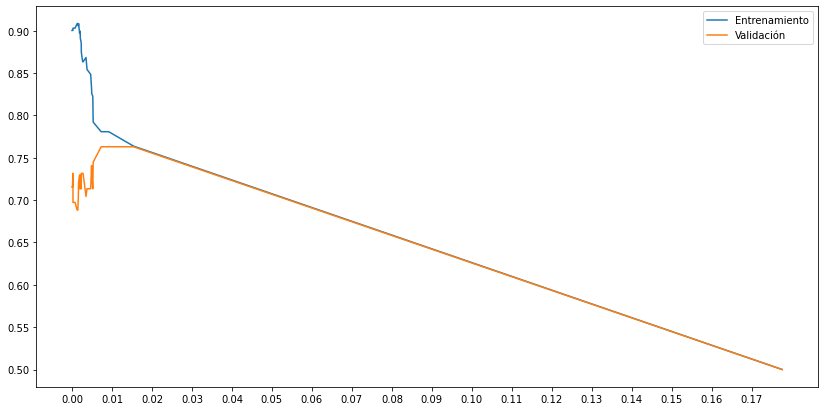

In [ ]:
plt.figure(figsize=(14,7))
sns.lineplot(y=auc_en, x=alfas, label='Entrenamiento')
sns.lineplot(y=auc_val, x=alfas, label='Validación')
plt.xticks(ticks=np.arange(0, 0.18, 0.01))
plt.show()

Se entrena el modelo con el alfa seleccionado donde la evaluación del entrenamiento es similar a la evaluación de la validación

In [ ]:
arbol = DecisionTreeClassifier(ccp_alpha=0.015)
arbol.fit(Xen, Yen)
Yen_p = arbol.predict(Xen)
Ypr_p = arbol.predict(Xpr)
print(roc_auc_score(Yen, Yen_p), roc_auc_score(Ypr, Ypr_p))

0.7808441558441558 0.763049853372434


# Aplicación con más variables

In [ ]:
X = Datos.select_dtypes('number').drop('mora', axis=1)
D = pd.get_dummies(Datos.select_dtypes('object'), drop_first=True)
XD = pd.concat([X,D], axis=1)
Y = Datos.mora

In [ ]:
medida = 'roc_auc'
arbol = DecisionTreeClassifier()

In [ ]:
hiperpar = {'max_depth': np.arange(3,8),
            'min_samples_leaf': np.arange(5,21),
            'min_samples_split': np.arange(8,26)}

In [ ]:
gscv = GridSearchCV(arbol, hiperpar, scoring=medida)
mod = gscv.fit(XD,Y)
print(mod.best_score_)
print(mod.best_estimator_)

0.8555440272288098
DecisionTreeClassifier(max_depth=5, min_samples_leaf=18, min_samples_split=8)


In [ ]:
Yp = mod.best_estimator_.predict(XD)
pd.crosstab(Y,Yp)

col_0,0,1
mora,,
0,212,11
1,39,80


In [ ]:
print('Precisión:', accuracy_score(Y,Yp))
print('F1:', f1_score(Y,Yp))
print('AUC:', roc_auc_score(Y,Yp))
print('Kappa:', cohen_kappa_score(Y,Yp))

Precisión: 0.8538011695906432
F1: 0.761904761904762
AUC: 0.8114707766514677
Kappa: 0.659104501415414


In [ ]:
def grafv(X, Y, modelo):
  ACP = PCA(2).fit(X)
  CP = ACP.fit_transform(X)
  C1, C2 = np.meshgrid(np.linspace(CP[:,0].min(), CP[:,0].max()),
                       np.linspace(CP[:,1].min(), CP[:,1].max()))
  C = np.array([C1.ravel(), C2.ravel()]).T
  Xt = pd.DataFrame(C@ACP.components_, columns=X.columns.values)*X.std() + X.mean()
  Yp = modelo.predict(Xt).reshape(C1.shape)
  plt.contourf(C1, C2, Yp, alpha = 0.75,
              cmap = ListedColormap(('green', 'red')))
  plt.scatter(CP[Y == np.unique(Y)[0], 0], CP[Y == np.unique(Y)[0], 1],
              c = 'green', label = np.unique(Y)[0])
  plt.scatter(CP[Y == np.unique(Y)[1], 0], CP[Y == np.unique(Y)[1], 1],
              c = 'red', label = np.unique(Y)[1])
  plt.title('Clasificación')
  plt.xlabel('CP1')
  plt.ylabel('CP2')
  plt.legend()
  plt.show()

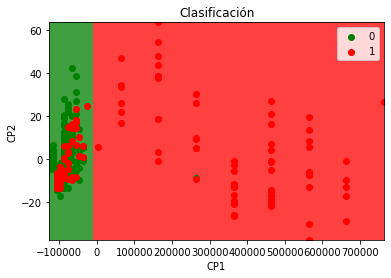

In [ ]:
grafv(XD, Y, mod.best_estimator_)

In [ ]:
Yprobs = mod.best_estimator_.predict_proba(XD)
tfp, tvp, umbrales = roc_curve(Y, Yprobs[:,1])
area = auc(tfp, tvp)

In [ ]:
umbrales[tvp-tfp == max(tvp-tfp)]

array([0.58333333])

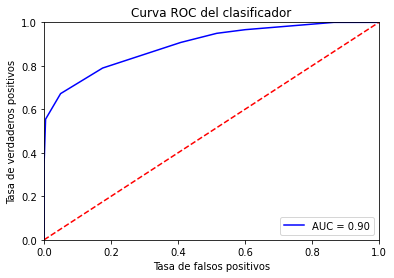

In [ ]:
plt.plot(tfp, tvp, 'b', label = 'AUC = %0.2f' %area)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('Tasa de verdaderos positivos')
plt.xlabel('Tasa de falsos positivos')
plt.title('Curva ROC del clasificador')
plt.show()

#Aplicación con más categorías

In [ ]:
movil = pd.read_excel('movil.xlsx')
movil.head()

,Edad,Educación,Velocidad_Viva,Velocidad_Entel,Velocidad_Tigo,Imp_comunic,Imp_entreten,Imp_estud,Imp_invest,Imp_trab,Imp_info,Imp_nego,Imp_compr,Imp_encont,movil,Sexo,cambio_movil
0,27.0,7.0,2.0,3.0,4.0,4.0,3.0,3.0,3.0,4.0,4.0,2.0,3.0,3.0,Viva,hombre,Tigo
1,27.0,10.0,3.0,2.0,3.0,4.0,3.0,3.0,4.0,3.0,4.0,4.0,3.0,3.0,Tigo,mujer,Viva
2,25.0,12.0,3.0,3.0,2.0,3.0,3.0,3.0,3.0,3.0,4.0,3.0,3.0,4.0,Entel,hombre,Tigo
3,16.0,12.0,2.0,3.0,4.0,4.0,3.0,2.0,3.0,3.0,4.0,3.0,4.0,4.0,Entel,mujer,Entel
4,26.0,16.0,3.0,3.0,4.0,4.0,4.0,3.0,4.0,5.0,5.0,4.0,4.0,4.0,Tigo,hombre,Tigo


In [ ]:
categs = list(movil.select_dtypes('object'))
movil[categs] = movil[categs].astype('category')

In [ ]:
X = movil.select_dtypes('number')
D = pd.get_dummies(movil.Sexo, drop_first=True)
XD = pd.concat([X,D], axis=1)
Y = movil.movil

In [ ]:
arbol = DecisionTreeClassifier(max_depth=4)
modelo = arbol.fit(XD,Y)
modelo.score(XD,Y)

0.5717884130982368

In [ ]:
print(export_text(arbol, feature_names=list(XD)))

|--- mujer <= 0.50
|   |--- Edad <= 27.50
|   |   |--- Velocidad_Tigo <= 2.50
|   |   |   |--- Edad <= 25.50
|   |   |   |   |--- class: Entel
|   |   |   |--- Edad >  25.50
|   |   |   |   |--- class: Entel
|   |   |--- Velocidad_Tigo >  2.50
|   |   |   |--- Imp_compr <= 3.50
|   |   |   |   |--- class: Entel
|   |   |   |--- Imp_compr >  3.50
|   |   |   |   |--- class: Entel
|   |--- Edad >  27.50
|   |   |--- Velocidad_Viva <= 2.50
|   |   |   |--- Velocidad_Tigo <= 2.50
|   |   |   |   |--- class: Entel
|   |   |   |--- Velocidad_Tigo >  2.50
|   |   |   |   |--- class: Tigo
|   |   |--- Velocidad_Viva >  2.50
|   |   |   |--- Imp_trab <= 3.50
|   |   |   |   |--- class: Entel
|   |   |   |--- Imp_trab >  3.50
|   |   |   |   |--- class: Viva
|--- mujer >  0.50
|   |--- Velocidad_Viva <= 2.50
|   |   |--- Velocidad_Tigo <= 3.50
|   |   |   |--- Edad <= 25.50
|   |   |   |   |--- class: Entel
|   |   |   |--- Edad >  25.50
|   |   |   |   |--- class: Tigo
|   |   |--- Velocidad_Ti

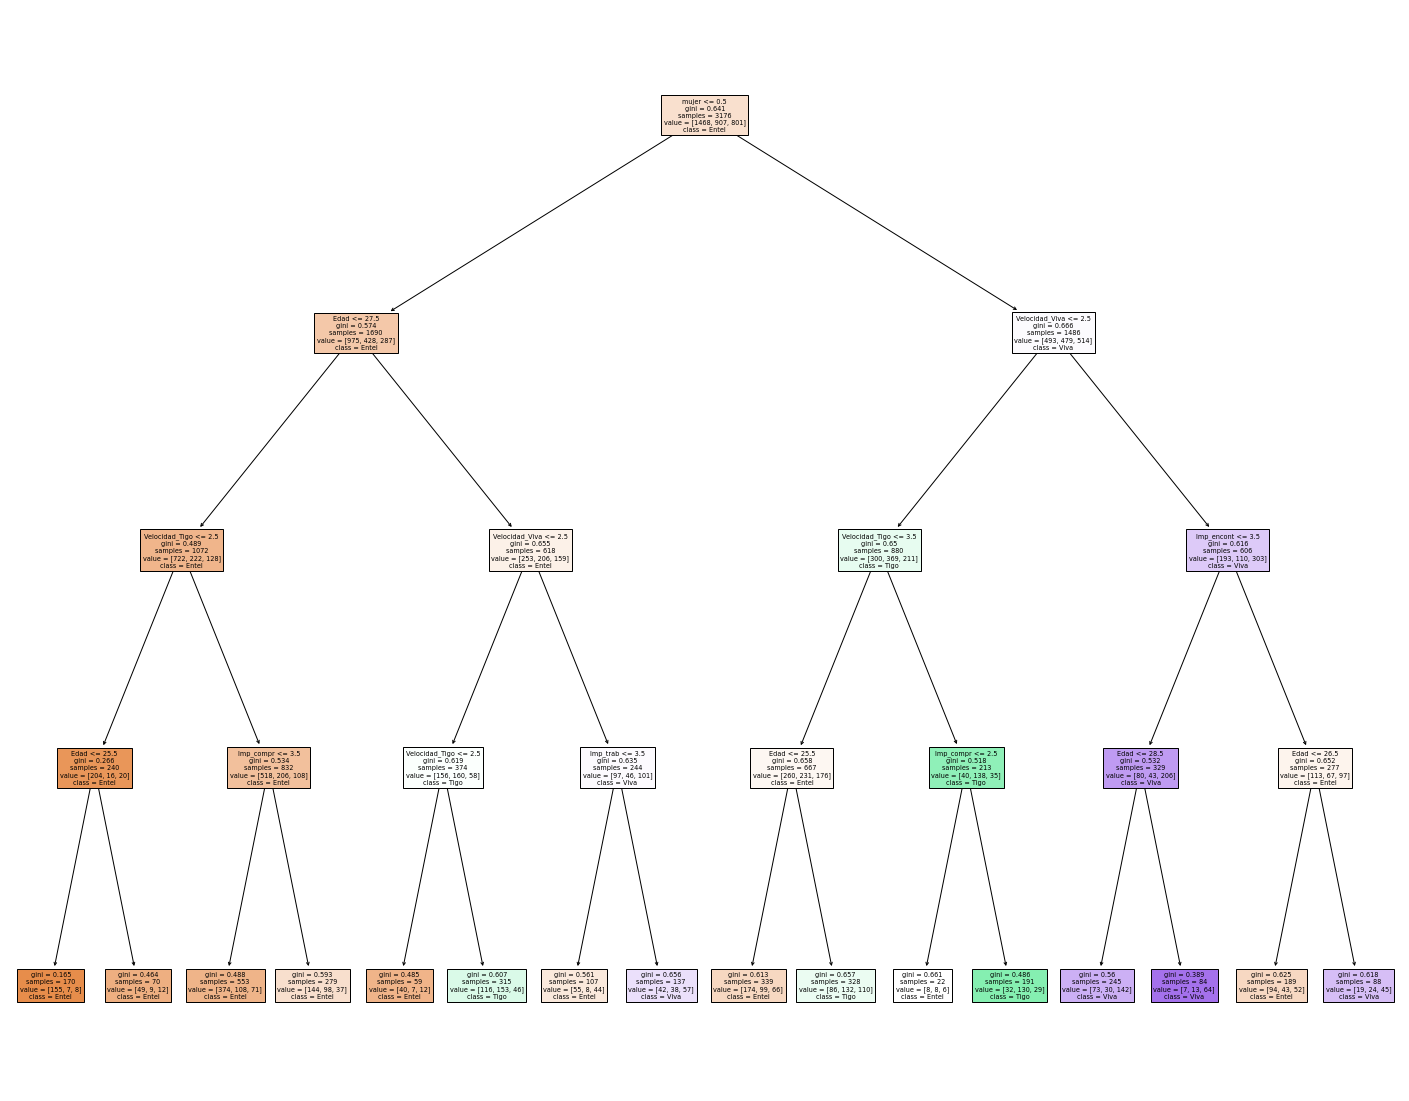

In [ ]:
fig = plt.figure(figsize=(25,20))
plot_tree(arbol, feature_names=list(XD), class_names=Y.cat.categories, filled=True);
fig.savefig("arbol.png")

In [ ]:
Yp = modelo.predict(XD)
pd.crosstab(Y,Yp)

col_0,Entel,Tigo,Viva
movil,,,
Entel,1093,234,141
Tigo,387,415,105
Viva,308,185,308


In [ ]:
hiperpar = {'max_depth': np.arange(3,8),
            'min_samples_leaf': np.arange(5,21),
            'min_samples_split': np.arange(8,26)}
arbol = DecisionTreeClassifier()
gscv = GridSearchCV(arbol, hiperpar, n_jobs=-1)
mod = gscv.fit(XD,Y)
print(mod.best_score_)
print(mod.best_estimator_)

0.5639231416827613
DecisionTreeClassifier(max_depth=6, min_samples_leaf=11, min_samples_split=23)


In [ ]:
print(export_text(mod.best_estimator_, feature_names=list(XD)))

|--- mujer <= 0.50
|   |--- Edad <= 27.50
|   |   |--- Velocidad_Tigo <= 2.50
|   |   |   |--- Edad <= 25.50
|   |   |   |   |--- Educación <= 7.50
|   |   |   |   |   |--- class: Entel
|   |   |   |   |--- Educación >  7.50
|   |   |   |   |   |--- Imp_compr <= 3.50
|   |   |   |   |   |   |--- class: Entel
|   |   |   |   |   |--- Imp_compr >  3.50
|   |   |   |   |   |   |--- class: Entel
|   |   |   |--- Edad >  25.50
|   |   |   |   |--- Imp_compr <= 3.50
|   |   |   |   |   |--- Imp_encont <= 3.50
|   |   |   |   |   |   |--- class: Entel
|   |   |   |   |   |--- Imp_encont >  3.50
|   |   |   |   |   |   |--- class: Entel
|   |   |   |   |--- Imp_compr >  3.50
|   |   |   |   |   |--- Educación <= 10.50
|   |   |   |   |   |   |--- class: Tigo
|   |   |   |   |   |--- Educación >  10.50
|   |   |   |   |   |   |--- class: Entel
|   |   |--- Velocidad_Tigo >  2.50
|   |   |   |--- Imp_compr <= 3.50
|   |   |   |   |--- Velocidad_Viva <= 2.50
|   |   |   |   |   |--- Edad <= 24.50

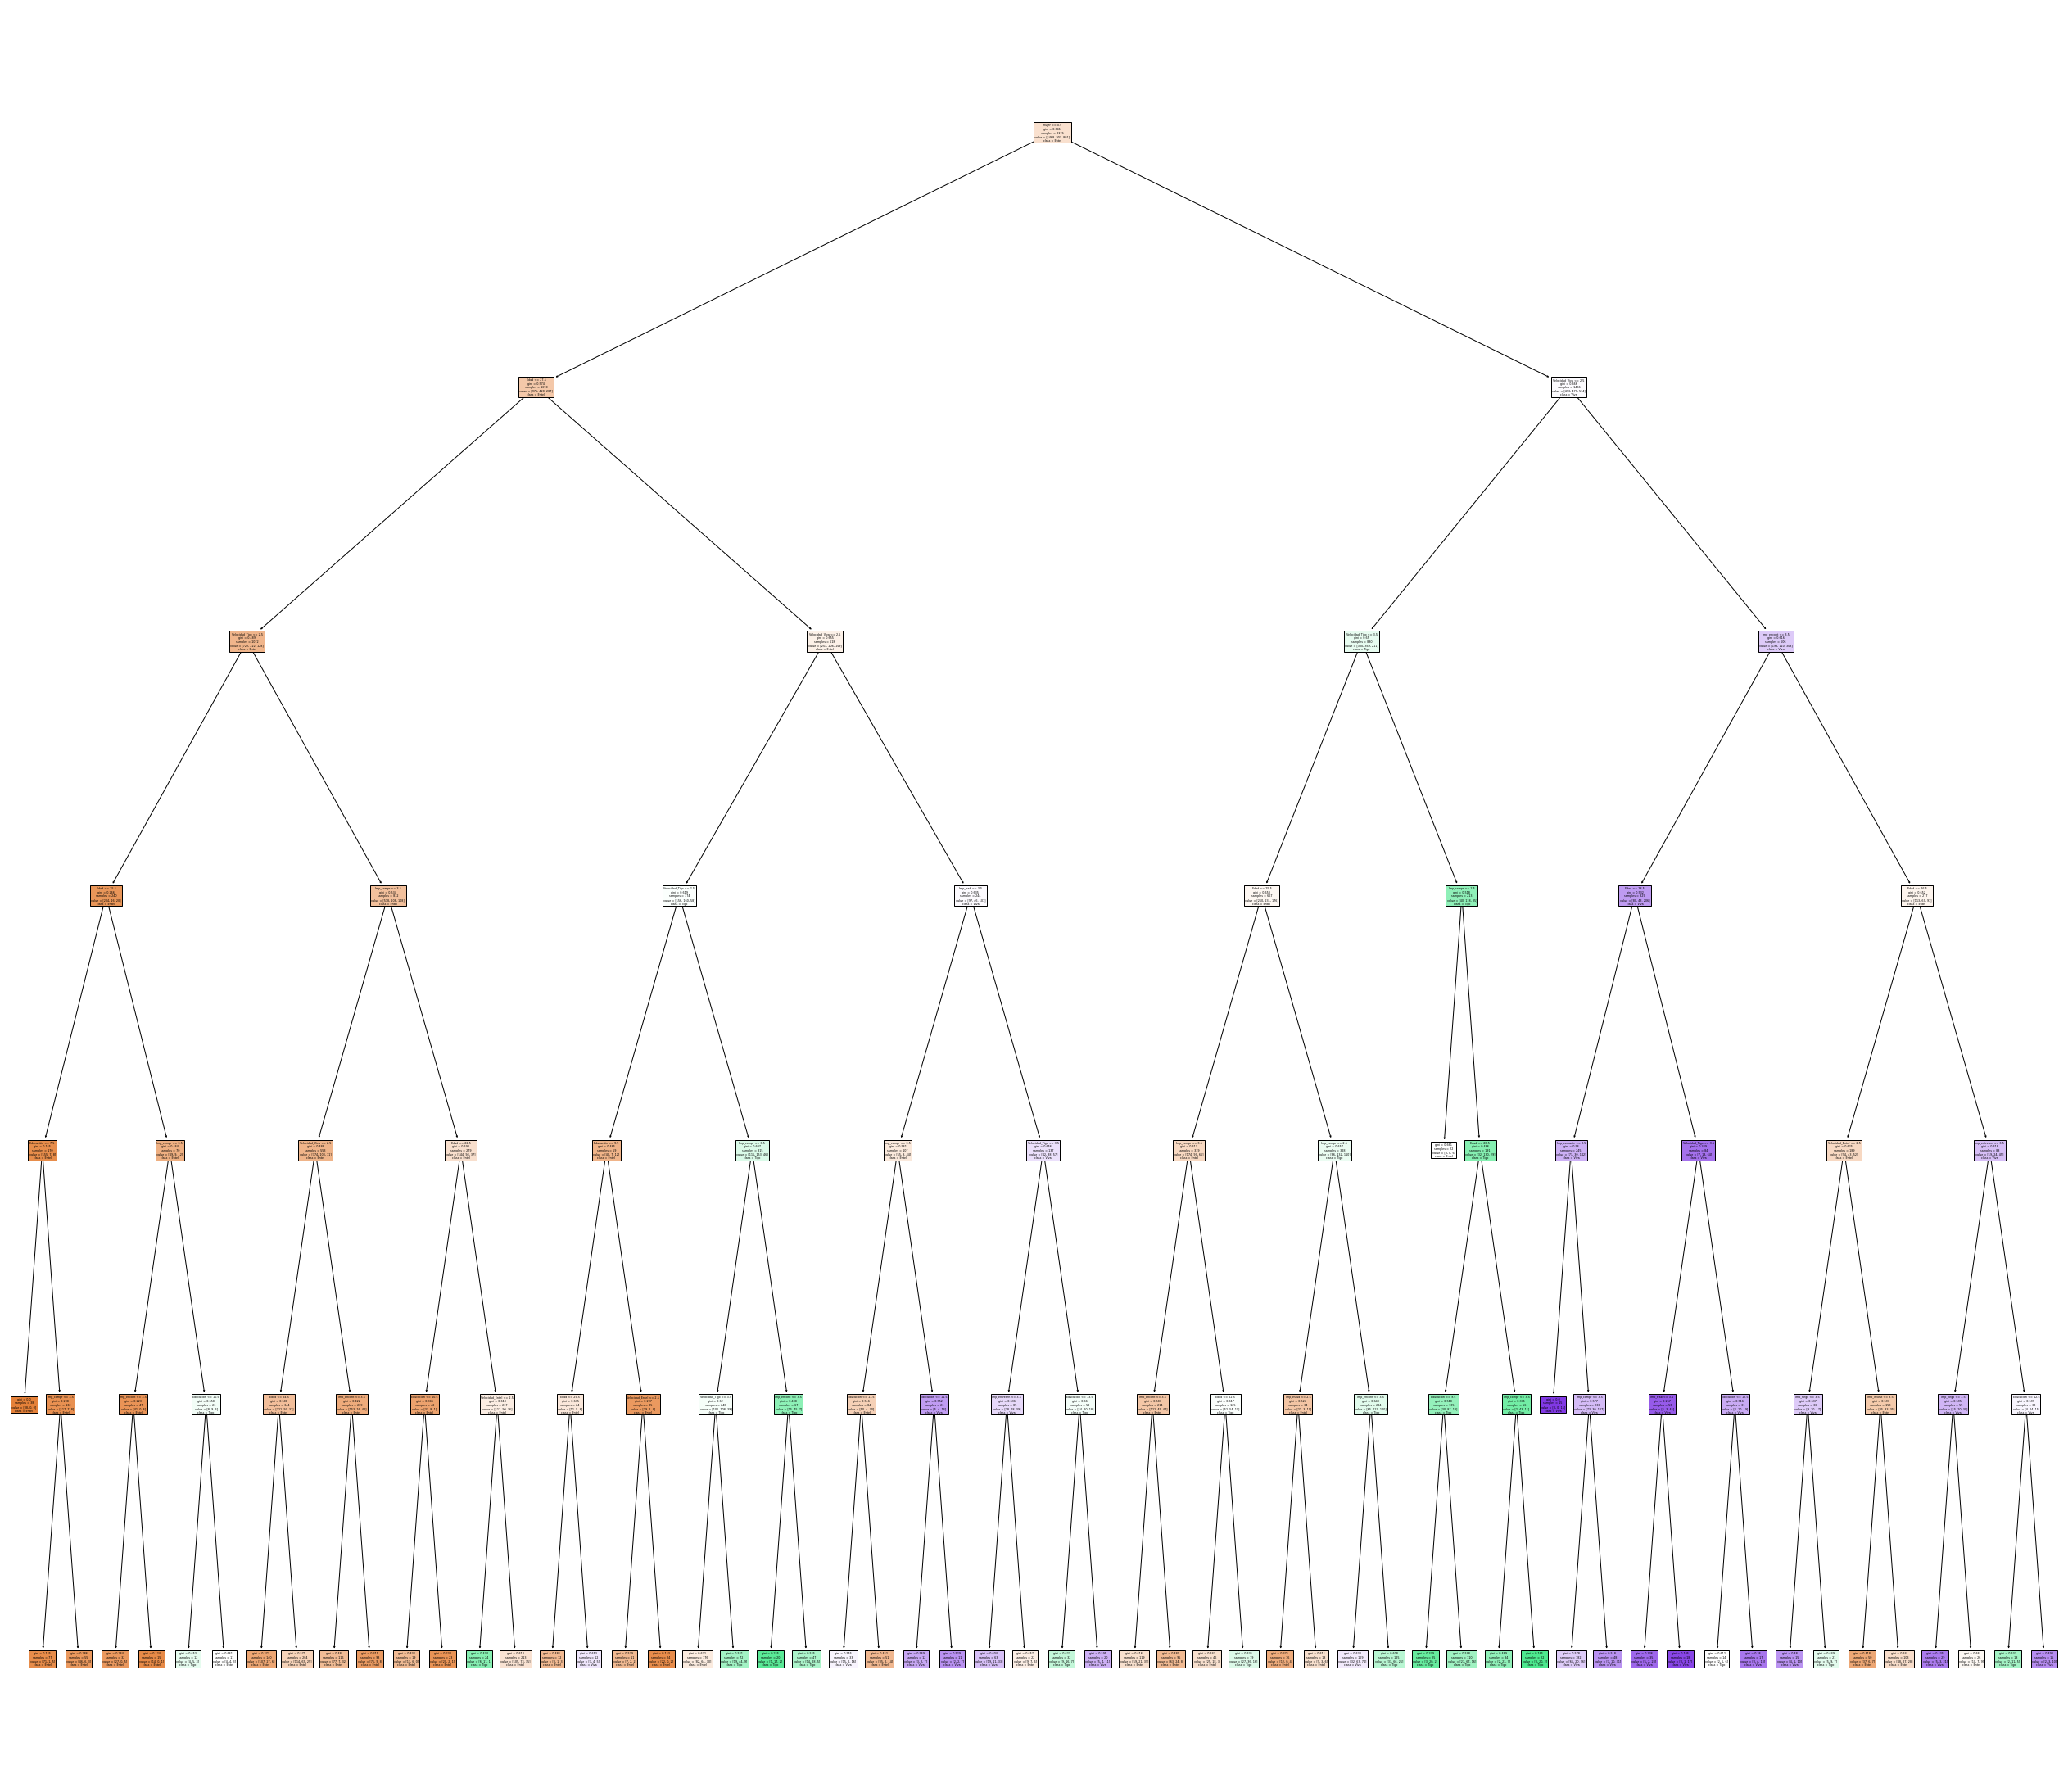

In [ ]:
fig = plt.figure(figsize=(45,40))
plot_tree(mod.best_estimator_, feature_names=list(XD), class_names=Y.cat.categories, filled=True);
fig.savefig("arbol.png")